In [2]:
print("hello")

hello


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data_regression = pd.read_csv('kc_house_data.csv')

# Display the first few rows of the dataset
data_regression.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Handle missing values if any (check for missing values)
data_regression.dropna(inplace=True)

# Select features and target variable
X_regression = data_regression[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y_regression = data_regression['price']

# Split the data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)


In [5]:
# Initialize and train the regression model
model_regression = LinearRegression()
model_regression.fit(X_train_regression, y_train_regression)


LinearRegression()

In [6]:
# Predict on the test set
y_pred_regression = model_regression.predict(X_test_regression)

# Evaluate the model
mse = mean_squared_error(y_test_regression, y_pred_regression)
mae = mean_absolute_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 45173046132.78905
Mean Absolute Error: 127493.34208656411
R-squared: 0.7011904448878485


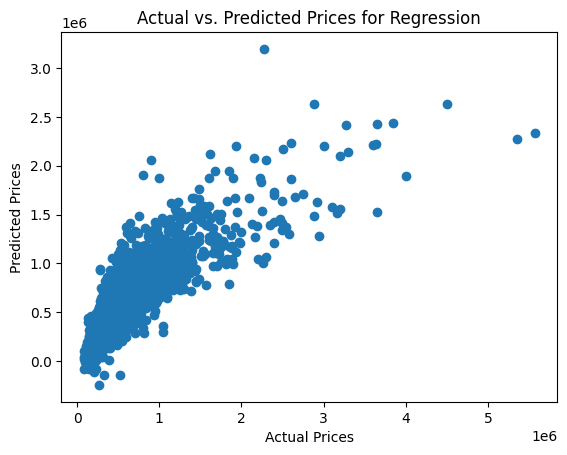

In [7]:
# Visualize actual vs. predicted values
plt.scatter(y_test_regression, y_pred_regression)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices for Regression')
plt.show()
